In [3]:
import json
from bs4 import BeautifulSoup
import requests
import html5lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3

In [124]:
def convert_price(s):
    a = s.str.replace('$','', regex = False)
    a = a.str.replace(',','', regex = False)
    a = a.astype('float')
    return a

In [102]:
urls = ['https://www.boxofficemojo.com/weekend/2023W01/?area=AU&ref_=bo_wey_table_7',
'https://www.boxofficemojo.com/weekend/2023W02/?area=AU&ref_=bo_wey_table_6',
'https://www.boxofficemojo.com/weekend/2023W03/?area=AU&ref_=bo_wey_table_5',
'https://www.boxofficemojo.com/weekend/2023W04/?area=AU&ref_=bo_wey_table_4',
'https://www.boxofficemojo.com/weekend/2023W05/?area=AU&ref_=bo_wey_table_3',
'https://www.boxofficemojo.com/weekend/2023W06/?area=AU&ref_=bo_wey_table_2',
'https://www.boxofficemojo.com/weekend/2023W07/?area=AU&ref_=bo_wey_table_1']

weeks_2023 = ['05/01/2023',
'12/01/2023',
'19/01/2023',
'26/01/2023',
'02/02/2023',
'09/02/2023',
'16/02/2023']

In [106]:
mov_list = []
for q,url in enumerate (urls):
    w1 = requests.get(url)
    content = w1.text
    soup = BeautifulSoup(content)
    rows = soup.findAll('tr') #EXTRACTS TABULAR DATA
    mov = pd.DataFrame(columns = ['week','rating','title','gross_per_week','mean_per_theater','total_gross'])
    mov['rating'] = list(range(1,11))
    mov['week'] = weeks_2023[q]
    for ii in range(10):
        dat = rows[ii+1].findAll('td') 
        mov.iloc[ii,2] = dat[2].text
        mov.iloc[ii,3] = dat[3].text
        mov.iloc[ii,4] = dat[7].text
        mov.iloc[ii,5] = dat[8].text
    mov_list.append(mov)

In [158]:
movies = pd.concat(mov_list)
movies
movies.to_csv('/Users/jgarciamendo/Documents/data_viz_code/movies_gross.csv', index = False)

In [159]:
movies["gross_per_week"] = convert_price(movies["gross_per_week"])
movies["mean_per_theater"] = movies["mean_per_theater"].str.replace("-","0")
movies["mean_per_theater"] = convert_price(movies["mean_per_theater"])
movies["total_gross"] = convert_price(movies["total_gross"])

In [167]:
mov_per_gross = movies.groupby(['title']).sum('gross_per_week')
mov_per_gross.reset_index(inplace=True)

In [185]:
mov_per_gross.head(16)

,title,rating,gross_per_week,mean_per_theater,total_gross
0,A Man Called Otto,33,2462222.0,7677.0,18670328.0
1,Andre Rieu In Dublin 2023,3,529082.0,3306.0,529082.0
2,Ant-Man and the Wasp: Quantumania,1,4450321.0,5374.0,5187728.0
3,Avatar: The Way of Water,10,16875037.0,20635.0,402046050.0
4,BTS: Yet to Come in Cinemas,7,354066.0,2902.0,498207.0
5,Blueback,18,368443.0,1540.0,1909964.0
6,Knock at the Cabin,13,1011623.0,3909.0,2940400.0
7,"Lyle, Lyle, Crocodile",21,2789073.0,7509.0,25486934.0
8,M3GAN,30,3152282.0,12463.0,17249183.0
9,Magic Mike's Last Dance,3,1875001.0,4489.0,4564668.0


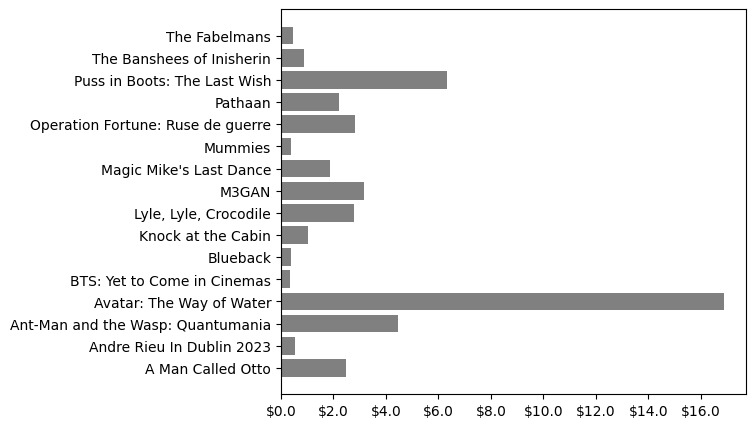

In [223]:
fig,ax = plt.subplots(figsize = (6, 5))
ax.barh(mov_per_gross.iloc[0:16,0],mov_per_gross.iloc[0:16,2]/1000000, color = 'grey')
ax.xaxis.set_major_formatter('${x:1.1f}')
plt.savefig("/Users/jgarciamendo/Documents/data_viz_code/mov_fig_1.png", dpi = 180, bbox_inches = 'tight')

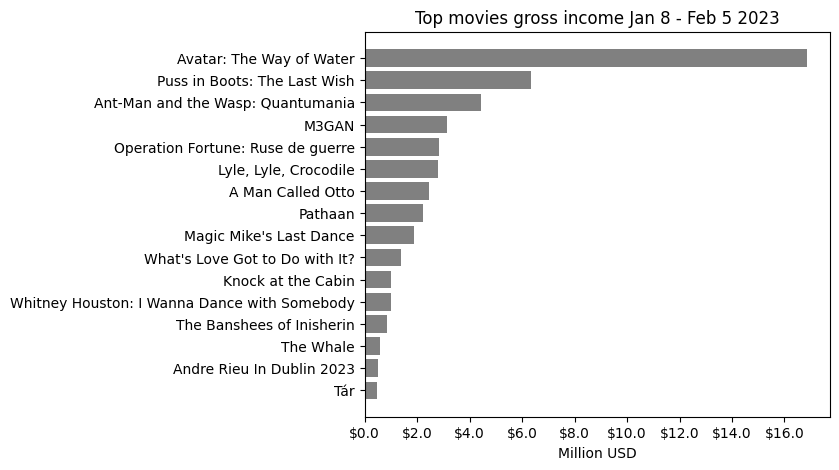

In [226]:
mov_sorted = mov_per_gross.sort_values(by = 'gross_per_week',ascending=False)
fig,ax = plt.subplots(figsize = (6, 5))
ax.barh(mov_sorted.iloc[0:16,0],mov_sorted.iloc[0:16,2]/1000000, color = 'grey')
ax.xaxis.set_major_formatter('${x:1.1f}')
ax.set_xlabel("Million USD")
ax.invert_yaxis()
ax.set_title("Top movies gross income Jan 8 - Feb 5 2023")
plt.savefig("/Users/jgarciamendo/Documents/data_viz_code/mov_fig_2.png", dpi = 180, bbox_inches = 'tight')

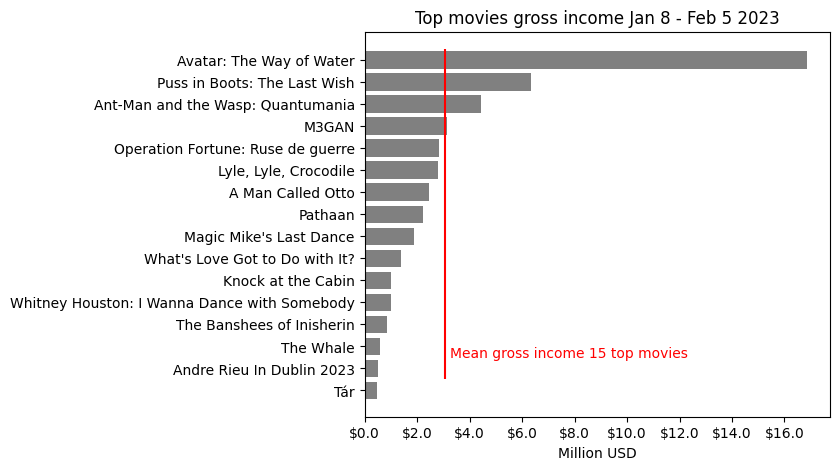

In [244]:
fig,ax = plt.subplots(figsize = (6, 5))
ax.barh(mov_sorted.iloc[0:16,0],mov_sorted.iloc[0:16,2]/1000000, color = 'grey')
ax.xaxis.set_major_formatter('${x:1.1f}')
ax.vlines(np.mean(mov_sorted.iloc[0:16,2]/1000000), -0.5, 14.5, color = 'red')#median gross income 15 movies same period
ax.invert_yaxis()
ax.set_xlabel("Million USD")
ax.text(3.25, 13.5, "Mean gross income 15 top movies", color = 'red')
ax.set_title("Top movies gross income Jan 8 - Feb 5 2023")
plt.savefig("/Users/jgarciamendo/Documents/data_viz_code/mov_fig_3.png", dpi = 180, bbox_inches = 'tight')

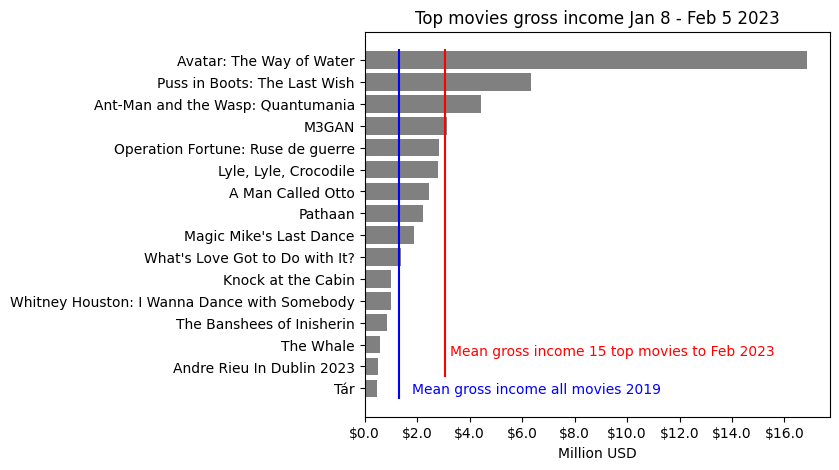

In [250]:
fig,ax = plt.subplots(figsize = (6, 5))
ax.barh(mov_sorted.iloc[0:16,0],mov_sorted.iloc[0:16,2]/1000000, color = 'grey')
ax.xaxis.set_major_formatter('${x:1.1f}')
ax.vlines(np.mean(mov_sorted.iloc[0:16,2]/1000000), -0.5, 14.5, color = 'red')
ax.vlines(1308413/1000000, -0.5, 15.5, color = 'blue') #Per release average gross 2018 AUS
ax.invert_yaxis()
ax.set_xlabel("Million USD")
ax.text(3.25, 13.5, "Mean gross income 15 top movies to Feb 2023", color = 'red')
ax.text(1.8, 15.25, "Mean gross income all movies 2019", color = "blue")
ax.set_title("Top movies gross income Jan 8 - Feb 5 2023")
plt.savefig("/Users/jgarciamendo/Documents/data_viz_code/mov_fig_4.png", dpi = 180, bbox_inches = 'tight')

In [251]:
mov_sorted.head(10)

,title,rating,gross_per_week,mean_per_theater,total_gross
3,Avatar: The Way of Water,10,16875037.0,20635.0,402046050.0
13,Puss in Boots: The Last Wish,22,6333025.0,20590.0,81899149.0
2,Ant-Man and the Wasp: Quantumania,1,4450321.0,5374.0,5187728.0
8,M3GAN,30,3152282.0,12463.0,17249183.0
11,Operation Fortune: Ruse de guerre,33,2820199.0,9644.0,16098184.0
7,"Lyle, Lyle, Crocodile",21,2789073.0,7509.0,25486934.0
0,A Man Called Otto,33,2462222.0,7677.0,18670328.0
12,Pathaan,14,2223757.0,18612.0,7861820.0
9,Magic Mike's Last Dance,3,1875001.0,4489.0,4564668.0
22,What's Love Got to Do with It?,25,1388609.0,4681.0,6017100.0


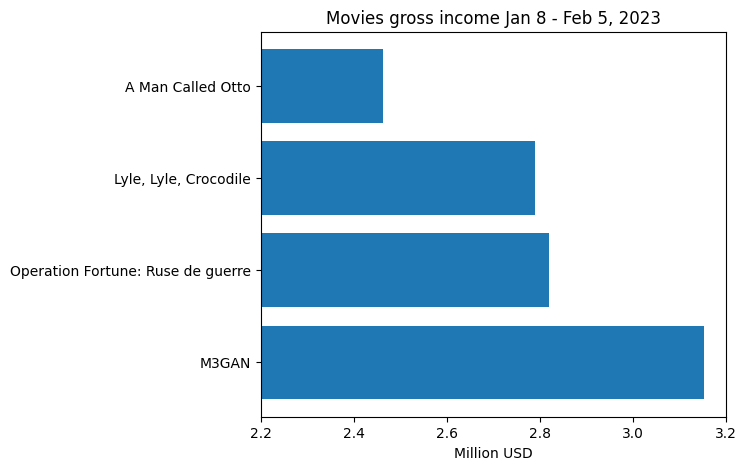

In [261]:
red_dataframe = mov_sorted.iloc[3:7,0:3]
red_dataframe
fig, ax = plt.subplots(figsize = (6,5))
ax.barh(red_dataframe['title'], red_dataframe['gross_per_week']/1000000)
ax.set_xlabel("Million USD")
ax.set_xlim([2.2, 3.2])
ax.set_title("Movies gross income Jan 8 - Feb 5, 2023")
plt.savefig("/Users/jgarciamendo/Documents/data_viz_code/mov_fig_5.png", dpi = 180, bbox_inches = 'tight')

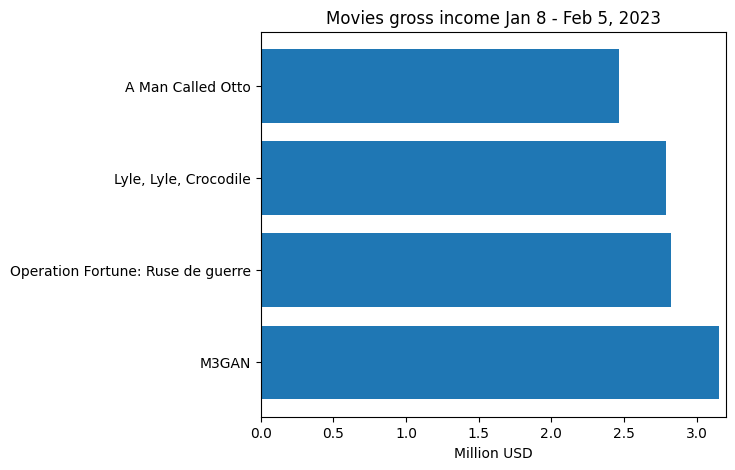

In [262]:
fig, ax = plt.subplots(figsize = (6,5))
ax.barh(red_dataframe['title'], red_dataframe['gross_per_week']/1000000)
ax.set_xlabel("Million USD")
ax.set_xlim([0, 3.2])
ax.set_title("Movies gross income Jan 8 - Feb 5, 2023")
plt.savefig("/Users/jgarciamendo/Documents/data_viz_code/mov_fig_6.png", dpi = 180, bbox_inches = 'tight')

In [128]:
eebo = pd.read_csv('/Users/jgarciamendo/Documents/data_viz_code/EEBO_clean.csv')
eebo.head(2)
pd.unique(eebo['Date'])
eebo['Date'].describe()

count     149.000000
mean     1584.288591
std        36.158864
min      1515.000000
25%      1552.000000
50%      1583.000000
75%      1618.000000
max      1640.000000
Name: Date, dtype: float64

In [129]:
eebo_red = eebo[(eebo['Date']>= 1515) & (eebo['Date']<1571)]

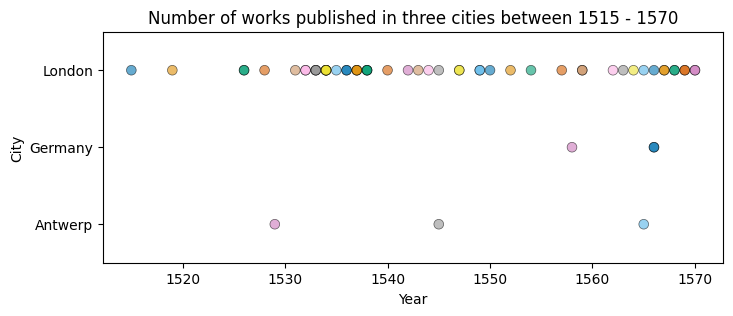

In [138]:
fig, ax = plt.subplots(figsize = (8,3))
sns.stripplot(x = 'Date', y = 'Place', data  = eebo_red, hue = str('Date'), jitter = False, ax = ax,
size = 7, alpha = 0.6, palette= 'colorblind', edgecolor = 'k', linewidth = 0.5, legend = False)
ax.set_xlabel("Year")
ax.set_ylabel("City")
ax.set_title("Number of works published in three cities between 1515 - 1570")
plt.savefig("/Users/jgarciamendo/Documents/data_viz_code/EEBO_plot_no_jitter.png", dpi = 200, bbox_inches ='tight')

In [36]:
#THE GAMPINDER PLOT HERE
geography = pd.read_excel('Data Geographies - v2 - by Gapminder.xlsx', sheet_name= 1)
hdi_index = pd.read_csv('hdi_human_development_index.csv')
corruption = pd.read_csv('corruption_perception_index_cpi.csv')


In [29]:
list(hdi_index.columns[23:-2]) #THE COLUMNS OF THE HDI DATAFRAME
hdi_red  = hdi_index.loc[:,list(hdi_index.columns[23:-2])] #JUST GET 2012-2017 TO MATCH THE CORRUPTION DATAFRAME
hdi_plot = pd.DataFrame(hdi_index['country']) #CRAEATES A NEW DATAFRAME WITH MEAN HDI VALUES 2012-2017 FOR ALL COUNTRIES
hdi_plot['human_development_index'] = np.mean(hdi_red, axis = 1)

(181, 7)

In [ ]:
corruption['mean_corruption'] = np.mean(corruption.iloc[:,1:], axis = 1)
corruption_plot = pd.DataFrame(corruption['country'])
corruption_plot['mean_corruption'] = corruption['mean_corruption']
corruption_plot.head(10)

In [45]:
df_hdi_corruption = hdi_plot.merge(corruption_plot, on = 'country', how = 'left')

In [50]:
df_hdi_corruption[df_hdi_corruption.isna().any(axis = 1)] #COUNTRIES WITH INCOMPLETE DATA

,country,human_development_index,mean_corruption
3,Andorra,0.861333,NaN
7,Antigua and Barbuda,0.762333,NaN
21,Belize,0.708167,NaN
57,Fiji,0.733000,NaN
59,"Micronesia, Fed. Sts.",0.609333,NaN
92,Kiribati,0.616500,NaN
93,St. Kitts and Nevis,0.764333,NaN
101,Liechtenstein,0.912167,NaN
112,Marshall Islands,0.699000,NaN
137,Palau,0.817500,NaN


In [53]:
df_hdi_corruption.shape
df_hdi_corruption = df_hdi_corruption.dropna()
df_hdi_corruption.shape

(176, 3)

In [62]:
geography.head(3)

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017",UNHCR
0,aus,Australia,asia,east_asia_pacific,east_asia_pacific,oecd,-25.0,135.00000,1945-11-01,East Asia & Pacific,High income,High income,Asia and the Pacific
1,brn,Brunei,asia,east_asia_pacific,east_asia_pacific,g77,4.5,114.66667,1984-09-21,East Asia & Pacific,High income,High income,Asia and the Pacific
2,khm,Cambodia,asia,east_asia_pacific,east_asia_pacific,g77,13.0,105.00000,1955-12-14,East Asia & Pacific,Lower middle income,Middle income,Asia and the Pacific


In [93]:
df = df_hdi_corruption.merge(geography, left_on = 'country', right_on='name')
df.head(2)

,country,human_development_index,mean_corruption,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017",UNHCR
0,Afghanistan,0.498833,11.500000,afg,Afghanistan,asia,asia_west,south_asia,g77,33.0,66.0,1946-11-19,South Asia,Low income,Low income,Asia and the Pacific
1,Angola,0.566000,19.333333,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.5,18.5,1976-12-01,Sub-Saharan Africa,Lower middle income,Middle income,Southern Africa


In [94]:
df['four_regions'] = df['four_regions'].str.capitalize()

In [139]:
df.to_csv("human_development_corruption_plotting_file.csv", index= False)

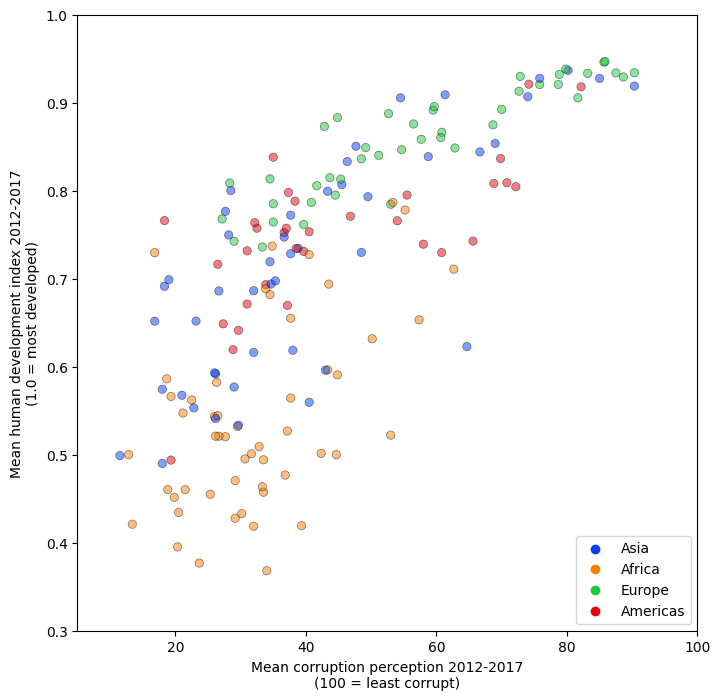

In [187]:
fig,ax = plt.subplots(figsize = (8,8))
sns.scatterplot(x = 'mean_corruption', y = 'human_development_index', data = df, hue = 'four_regions',
                palette = 'bright', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, ax = ax )
ax.set_xlim([5, 100])
ax.set_ylim([0.3, 1])
plt.legend(loc = 'lower right')
ax.set_xlabel("Mean corruption perception 2012-2017\n(100 = least corrupt)")
ax.set_ylabel("Mean human development index 2012-2017\n(1.0 = most developed)")
plt.savefig('corruption_hdi_minimal.png', dpi = 200, bbox_inches = 'tight')

In [117]:
#THE REGRESSION TREND
from sklearn.linear_model import LinearRegression
np_corruption = np.log(df['mean_corruption'].to_numpy())
x = np_corruption.reshape(-1,1)
y =  df['human_development_index'].to_numpy()

model = LinearRegression()
model.fit(x, y)
X = np.linspace(10,90,100)
y_pred = model.predict(np.log(X.reshape(-1,1)))


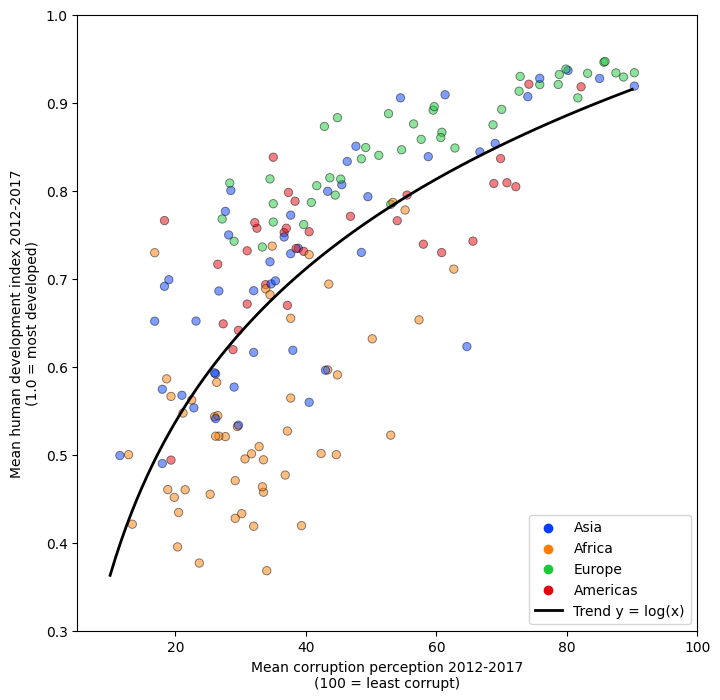

In [188]:
fig,ax = plt.subplots(figsize = (8,8))
sns.scatterplot(x = 'mean_corruption', y = 'human_development_index', data = df, hue = 'four_regions',
                palette = 'bright', alpha = 0.5, edgecolor = 'k', linewidth = 0.65, ax = ax )
ax.plot(X, y_pred, color = 'k', lw = 2, label = "Trend "+ "y = log(x)")
ax.set_xlim([5, 100])
ax.set_ylim([0.3, 1])
plt.legend(loc = 'lower right')
ax.set_xlabel("Mean corruption perception 2012-2017\n(100 = least corrupt)")
ax.set_ylabel("Mean human development index 2012-2017\n(1.0 = most developed)")
plt.savefig('corruption_hdi_trend.png', dpi = 200, bbox_inches = 'tight')

In [173]:
df_index_country = df.set_index('country')
countries_of_interest = ['Cape Verde', 'Rwanda','Argentina','Australia','Burkina Faso',
                         'Myanmar','Ecuador','Bhutan','Greece','Qatar','Iraq','Afghanistan']
df2 = df_index_country.loc[countries_of_interest]
df2.columns

Index(['human_development_index', 'mean_corruption', 'geo', 'name',
       'four_regions', 'eight_regions', 'six_regions', 'members_oecd_g77',
       'Latitude', 'Longitude', 'UN member since', 'World bank region',
       'World bank, 4 income groups 2017', 'World bank, 3 income groups 2017',
       'UNHCR'],
      dtype='object')

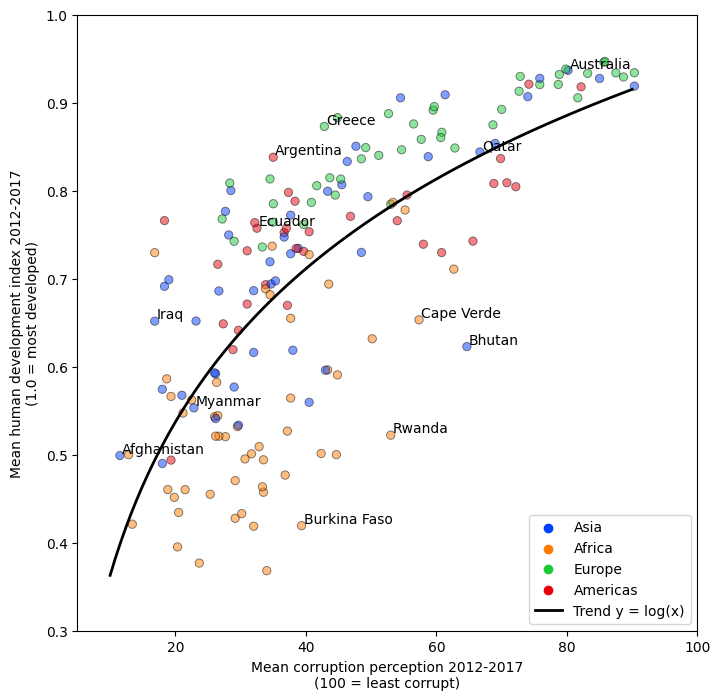

In [189]:
fig,ax = plt.subplots(figsize = (8,8))
sns.scatterplot(x = 'mean_corruption', y = 'human_development_index', data = df, hue = 'four_regions',
                palette = 'bright', alpha = 0.5, edgecolor = 'k', linewidth = 0.65, ax = ax )
ax.plot(X, y_pred, color = 'k', lw = 2, label = "Trend "+ "y = log(x)")
for xi, yi, text in zip(df2['mean_corruption'], df2['human_development_index'], df2['name']):
    ax.annotate(text,
                xy = (xi, yi), xycoords='data',
                xytext = (1.5,2), textcoords='offset points')
ax.set_xlim([5, 100])
ax.set_ylim([0.3, 1])
plt.legend(loc = 'lower right')
ax.set_xlabel("Mean corruption perception 2012-2017\n(100 = least corrupt)")
ax.set_ylabel("Mean human development index 2012-2017\n(1.0 = most developed)")
plt.savefig('corruption_hdi_fully_annotated.png', dpi = 200, bbox_inches = 'tight')

In [ ]:
url1 = 'https://www.boxofficemojo.com/weekend/2023W01/?area=AU&ref_=bo_wey_table_7'
w1 = requests.get(url1)
content = w1.text

In [5]:
file_url = 'https://raw.githubusercontent.com/finxter/FinxterTutorials/main/nlights.txt'
file_url2 = 'https://www.pythontutorial.net/wp-content/uploads/2020/10/the-zen-of-python.txt'
http     = urllib3.PoolManager()
response = http.request('GET', file_url2)
data     = response.data.decode('utf-8')
print(data)

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [9]:
data.count('is')

10

In [ ]:
dat = rows[1].findAll('td') #dat correspond to row x in rows object
print(dat)

[<td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">1</td>, <td class="a-text-right mojo-field-type-positive_integer">1</td>, <td class="a-text-left mojo-field-type-release mojo-cell-wide"><a class="a-link-normal" href="/release/rl49644289/?ref_=bo_we_table_1">Avatar: The Way of Water</a></td>, <td class="a-text-right mojo-field-type-money mojo-estimatable">$5,690,800</td>, <td class="a-text-right mojo-number-negative mojo-number-delta mojo-field-type-percent_delta mojo-estimatable">-21.4%</td>, <td class="a-text-right mojo-field-type-positive_integer mojo-estimatable">857</td>, <td class="a-text-right mojo-number-negative mojo-number-delta mojo-field-type-integer mojo-estimatable">-150</td>, <td class="a-text-right mojo-field-type-money mojo-estimatable">$6,640</td>, <td class="a-text-right mojo-field-type-money mojo-estimatable">$45,875,422</td>, <td class="a-text-right mojo-field-type-positive_integer">4</td>, <td class="a-text-left mojo-

In [ ]:
soup = BeautifulSoup(content)
rows = soup.findAll('tr') #EXTRACTS TABULAR DATA

In [ ]:
dat[7].text

'$6,640'

In [ ]:
mov = pd.DataFrame(columns = ['week','rating','title','gross_per_week','mean_per_theater','total_gross'])
mov['rating'] = list(range(1,11))
mov['week'] = '05/01/2023'
mov.shape

(10, 6)

In [ ]:
for ii in range(10):
    dat = rows[ii+1].findAll('td') 
    mov.iloc[ii,2] = dat[2].text
    mov.iloc[ii,3] = dat[3].text
    mov.iloc[ii,4] = dat[7].text
    mov.iloc[ii,5] = dat[8].text
    